In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', 1000) # shows all the columns
pd.set_option('display.float_format', lambda x: '%.4f' % x) # displays outputs with 1 decimal
pd.set_option('display.max_rows', 10000) # shows all the rows
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick
from mizani.formatters import percent_format


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Model Building

In [160]:
first_column = dummy_data.pop('Churn Value') 
dummy_data.insert(0, 'Churn Value', first_column)

In [161]:
dummy_data.head()

,Churn Value,Tenure Months,Monthly Charges,Total Charges,Count_OnlineServices,Streaming Services,Tenure_Year_First,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Group_Between 2 to 5 Years,Tenure Group_Less Than 1 Year,Tenure Group_More than 5 Years
0,1,2.0000,53.8500,108.1500,2,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,1,2.0000,70.7000,151.6500,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,1,8.0000,99.6500,820.5000,3,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3,1,28.0000,104.8000,3046.0500,4,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
4,1,49.0000,103.7000,5036.3000,4,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


## Train-Test-split

Splitting the main data into train and validation data, where we finalise the model using the training data and finally use the validation data to see how our model performs on unseen data. This is important so that we know, how our model makes prediction on future clients

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = dummy_data.iloc[:,1:]
y = dummy_data.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=123, stratify=y)

In [163]:
X_train.head()

,Tenure Months,Monthly Charges,Total Charges,Count_OnlineServices,Streaming Services,Tenure_Year_First,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Group_Between 2 to 5 Years,Tenure Group_Less Than 1 Year,Tenure Group_More than 5 Years
5481,53.0000,92.5500,4779.4500,3,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0
2249,61.0000,106.4500,6300.1500,4,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1
1998,16.0000,20.4000,321.4000,0,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4564,71.0000,25.3500,1847.5500,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3025,11.0000,111.4000,1183.0500,5,1,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0


## Class Imbalance

### Customer Churning Rate: 24%

There is a class imbalance , distribution of records across the classes( Churn/Non-Churned) is not equal. Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance,specifically for the minority class (Churn)

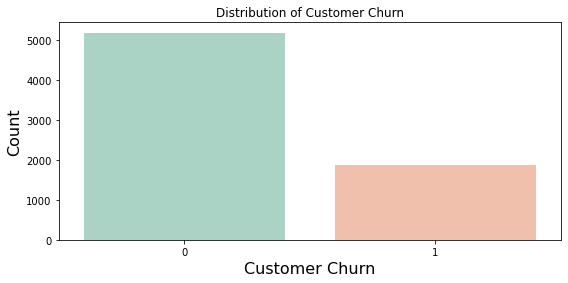

In [164]:
plt.figure(figsize=(9,4))
churn = data['Churn Value'].value_counts()
sns.barplot(y=churn.values, x=churn.index, alpha=0.6,palette='Set2')
plt.title('Distribution of Customer Churn')
plt.xlabel('Customer Churn', fontsize=16)
plt.ylabel('Count', fontsize=16);

### Sampling methods

Data sampling transform an imbalance training dataset in order to better balance the class distribution. Once balanced, standard machine learning algorithms can be trained directly on the transformed dataset without any modification.
The sampling techniques include upsampling and downsampling. Let's create 3 sample :
* **Resampling by upsampling the minority class** - Randomly resample the minority class to create new data.
* **Resampling by upsampling the minority class using SMOTE** - Using the nearest neighbors of the minority observations to create new synthetic data
* **Resampling by downsampling the majority class** - Randomly some samples of the majority class

In [165]:
# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy= 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (4930, 36) (4930,)
Upsampled shape: (7244, 36) (7244,)
SMOTE sample shape: (7244, 36) (7244,)
Downsampled shape: (2616, 36) (2616,)


## Evaluation Metric


For the business, the cost of acquiring a customer is far more than replacing an existing one. So to evaluate the strength of the machine learning model, **Recall** is chosen as the required metric. 

Recall quantifies the number of correct minority class predictions (churn) made out of all correct minority class predictions that could have been made. 

Recall score is calculated by true positives (TP) divided by the total number of true positives(TP) and false negatives(FN).

## Baseline Model

Here we are running a simple logistic regression on all the 4 samples, to see which sample yields the best result

In [166]:
# Creating the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d),
               }

for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(random_state=123), methods_data[method][0], methods_data[method][1], cv=5, scoring='recall')
    print(f"The best recall Score for {method} data:")
    print (lr_results.mean())


The best recall Score for Original data:
0.5558158579743208
The best recall Score for Upsampled data:
0.7990024766622214
The best recall Score for SMOTE data:
0.8309658982663365
The best recall Score for Downsampled data:
0.8012547161533737


#### We see that SMOTE sample gives the best performance. 
We now run three models on the SMOTE sample and see which models give good recall scores



In [167]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(random_state=123)))
models.append(('GB', GradientBoostingClassifier(random_state=123)))

for name, model in models:
    lr_results = cross_val_score(model, x_train_sm, y_train_sm, cv=5, scoring='recall')
    print(f"The best recall Score for {model}:")
    print (lr_results.mean())

The best recall Score for LogisticRegression():
0.8309658982663365
The best recall Score for RandomForestClassifier(random_state=123):
0.8431122118498762
The best recall Score for GradientBoostingClassifier(random_state=123):
0.8566427891026862


We see that recall score on all the models are quite good, so fitting a pipeline with hyperparameters to arrive at the best model

In [168]:
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=123))])
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=123))])
pipe_gb = Pipeline([('clf', GradientBoostingClassifier(random_state=123))])


grid_params_lr = [{'clf__penalty': ['l1', 'l2'], 'clf__C': np.logspace(0, 4, 10)}] 
grid_params_lr_only_l2 = [{'clf__penalty': ['l2'], 'clf__C': np.logspace(0, 4, 10),'clf__solver': ['newton-cg','saga','sag','liblinear']}] 
grid_params_rf = [{"clf__n_estimators": [50,150,100,200],"clf__max_depth":[1,3,5,10,None,20], "clf__min_samples_leaf":[1,2],
                 "clf__max_features":[ 0.7, 0.2,'log2','sqrt']}]
grid_params_gb = [{"clf__n_estimators": [5,50,100,150],"clf__max_depth":[1,2,3,5,10,None], "clf__min_samples_leaf":[1,2],
                 "clf__max_features":[ 0.7, 0.2,'log2','sqrt'],"clf__learning_rate":[ 0.1,0.2]}]


# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,param_grid=grid_params_lr,scoring='recall',cv=5) 
gs_lr_only_l2 = GridSearchCV(estimator=pipe_lr,param_grid=grid_params_lr_only_l2,scoring='recall',cv=5)
gs_rf = GridSearchCV(estimator=pipe_rf,param_grid=grid_params_rf,scoring='recall',cv=5, n_jobs=jobs)
gs_gb = GridSearchCV(estimator=pipe_gb,param_grid=grid_params_gb,scoring='recall',cv=5, n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_only_l2, gs_rf,gs_gb]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression only L2', 2: 'Random Forest', 3: 'Gradient Boosting'}

In [169]:
# Fit the grid search objects
print('****Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(x_train_sm, y_train_sm)
    # Best params
    print('Best params: %s' % gs.best_params_)
    print('Best estimator: %s' % gs.best_estimator_)
    # Best training data accuracy
    print('Best training recall score: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    print ("Test set AUC score for best params: %2.2f" % roc_auc_score(y_test, y_pred))
    print ("---Test set Confusion Matrix---")
    print(confusion_matrix(y_test, y_pred))
    print("-----------------------------------------------------------------------------------------------------------")

****Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1291.5496650148827, 'clf__penalty': 'l2'}
Best estimator: Pipeline(steps=[('clf',
                 LogisticRegression(C=1291.5496650148827, random_state=123))])
Best training recall score: 0.839
Test set recall score for best params: 0.677 
Test set AUC score for best params: 0.74
---Test set Confusion Matrix---
[[1261  291]
 [ 181  380]]
-----------------------------------------------------------------------------------------------------------

Estimator: Logistic Regression only L2
Best params: {'clf__C': 2.7825594022071245, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best estimator: Pipeline(steps=[('clf',
                 LogisticRegression(C=2.7825594022071245, random_state=123,
                                    solver='liblinear'))])
Best training recall score: 0.833
Test set recall score for best params: 0.677 
Test set AUC score for best params: 0.75
---Test set Confusion Matri

The top two models are Random Forest and Gradient Boosting. Let's analyze their confusion matrix

Even though RF has higher recall, that is very low False negatives, by choosing RF will greatly increase the number of false positives. The RF model has incorrectly identified only 48 churns as non-churns, however identified 872 non-churns as churns.

But to have a balance between the identifying both the corect churners and non churners, the model with highest AUC is chosen here, which is the **Gradient Boosting model**.

So let's fit the final model and analyze the feature importance

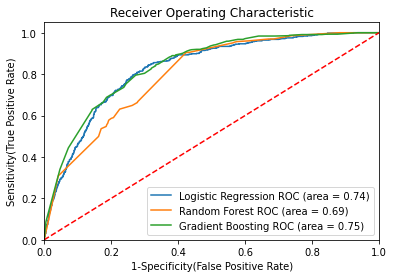

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(C=1291.5496650148827, random_state=123),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(max_depth=1, max_features=0.7, n_estimators=150, random_state=123),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(max_features=0.7, n_estimators=5, random_state=123),
}

]

# Below for loop iterates through  models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train_sm, y_train_sm) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [171]:
model = GradientBoostingClassifier(max_features=0.7, n_estimators=5,random_state=123)

model_final = model.fit(x_train_sm, y_train_sm)
y_pred = model_final.predict(X_test)
feature_imp=model_final.feature_importances_

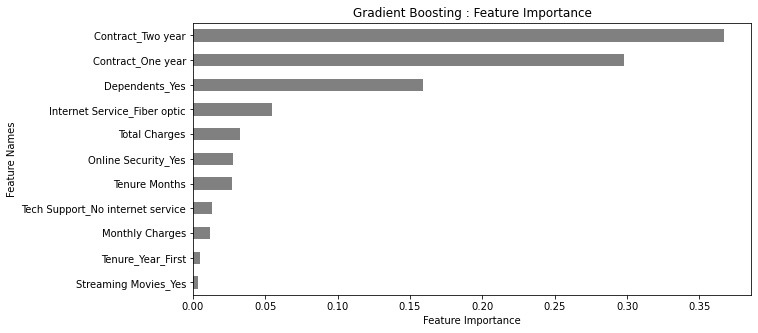

In [194]:
plt.figure(figsize=(10,5))
(pd.Series(feature_imp, index=x_train_sm.columns).nlargest(11).plot(kind='barh',color='grey')).invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names");
plt.title("Gradient Boosting : Feature Importance");

In [173]:
TN,FP,FN,TP=confusion_matrix(y_test, y_pred).ravel()
print('TN :',TN), print('FP:',FP),print('FN :',FN),print('TP :',TP);

TN : 1056
FP: 496
FN : 98
TP : 463


## Cost Evaluation

Cost evaluation is explored understand the cost implications after implementing the model
Assigning the following values to the confusion matrix:
* **TN : USD 0** - The model correctly identified a loyal customer, in this case, business does not bear any action cost
* **FN : USD 500** - As we have discussed earlier, False negatives have grave implications because acquiring a replacement customer and all other associated costs are huge. Business approximately pay, example 500 for each customer where the model incorrectly predicts that a customer will stay
* **TP and FP : USD 100** -  Model predicts these customers as churning, so business puts in a retention cost such as setting up few promotions, ad cost etc of an amount of say 100 USD per customer 

### Calculating few Scenarios:
    
**1. Worst Case** : Business does not have any model to predict customer churn and assume that no customer will churn.But in reality,(FN+TP)= 561 customers ended up churning.

In [174]:
print ("So to maintain the customer base, the company would have to spend",(FN+TP)*500,"USD")

So to maintain the customer base, the company would have to spend 280500 USD


**2. Retention Effort** : The business doesn’t apply any predictive model and decides to focus retention efforts on all customers.So the company gives 100 USD worth of offers to everyone.

In [175]:
print ("The business would have to spend",sum(confusion_matrix(y_test, y_pred).ravel())*100,"USD")

The business would have to spend 211300 USD


**3.Applying the Model** : 
The current models identifies, FN,FP and TP . 

In [176]:
print("So to maintain the customer base, the company would have to spend",(FN*500)+((FP+TP)*100),"USD")

So to maintain the customer base, the company would have to spend 144900 USD


So, using this model, with regard to worst case scenario, the business can save

(280,500 - 144,900) USD = 135,600 USD

And, with regard the to Retention scenario, the business can save

(211,300 - 144,900) USD = 66,400 USD

In [177]:
cost = pd.DataFrame({'Scenarios':['No Model', 'Retention Effort', 'Gradient Boosting Model'],
        'Cost To Company':[(FN+TP)*500, sum(confusion_matrix(y_test, y_pred).ravel())*100, (FN*500)+(FP+TP)*100],
        'Savings by Applying the model' :[((FN+TP)*500-((FN*500)+(FP+TP)*100)),
                                          ((sum(confusion_matrix(y_test, y_pred).ravel())*100)-((FN*500)+(FP+TP)*100)),
                                          0]})

cost

,Scenarios,Cost To Company,Savings by Applying the model
0,No Model,280500,135600
1,Retention Effort,211300,66400
2,Gradient Boosting Model,144900,0
